# Amazon Alexa Review - Sentiment Analysis

Analyzing the Amazon Alexa dataset and building classification models to predict if the sentiment of a given input sentence is positive or negative.


### Importing required libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer

nltk.download("stopwords")
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words("english"))


from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Exploratory Data Analysis


In [4]:
# Load the data

data = pd.read_csv("Data/cleaned_reviews.csv")

print(f"Dataset shape : {data.shape}")


Dataset shape : (1299, 3)


In [5]:
data.head()


,rating,Comments,Product Name
0,5,Very useful but calibration facility not avail...,omran 7120
1,5,The rate offered was much lower than Amazon an...,omran 7120
2,4,Nice product its genuine....it is a good conpa...,omran 7120
3,5,"Awesome , accurate",omran 7120
4,5,Better product,omran 7120


In [6]:
data["feedback"] = data["rating"].apply(lambda x: 1 if x > 2 else 0)


In [7]:
# Column names

print(f"Feature names : {data.columns.values}")


Feature names : ['rating' 'Comments' 'Product Name' 'feedback']


In [8]:
# Check for null values

data.isnull().sum()


rating          0
Comments        0
Product Name    0
feedback        0
dtype: int64

In [9]:
# Getting the record where 'verified_reviews' is null

data[data["Comments"].isna() == True]


,rating,Comments,Product Name,feedback


In [10]:
# We will drop the null record

data.dropna(inplace=True)


In [11]:
print(f"Dataset shape after dropping null values : {data.shape}")


Dataset shape after dropping null values : (1299, 4)


In [12]:
# Creating a new column 'length' that will contain the length of the string in 'Comments' column

data["length"] = data["Comments"].apply(len)


In [13]:
data.head()


,rating,Comments,Product Name,feedback,length
0,5,Very useful but calibration facility not avail...,omran 7120,1,63
1,5,The rate offered was much lower than Amazon an...,omran 7120,1,232
2,4,Nice product its genuine....it is a good conpa...,omran 7120,1,91
3,5,"Awesome , accurate",omran 7120,1,18
4,5,Better product,omran 7120,1,14


In [14]:
# Randomly checking for 10th record

print(f"'Comments' column value: {data.iloc[10]['Comments']}")  # Original value
print(
    f"Length of review : {len(data.iloc[10]['Comments'])}"
)  # Length of review using len()
print(
    f"'length' column value : {data.iloc[10]['length']}"
)  # Value of the column 'length'


'Comments' column value: Accurate and perfect.
Length of review : 21
'length' column value : 21


Datatypes of the features


In [15]:
data.dtypes


rating           int64
Comments        object
Product Name    object
feedback         int64
length           int64
dtype: object

### Analyzing 'rating' column

This column refers to the rating of the variation given by the user


In [16]:
len(data)


1299

In [17]:
# Distinct values of 'rating' and its count

print(f"Rating value count: \n{data['rating'].value_counts()}")


Rating value count: 
rating
5    795
4    408
3     59
1     26
2     11
Name: count, dtype: int64


Let's plot the above values in a bar graph


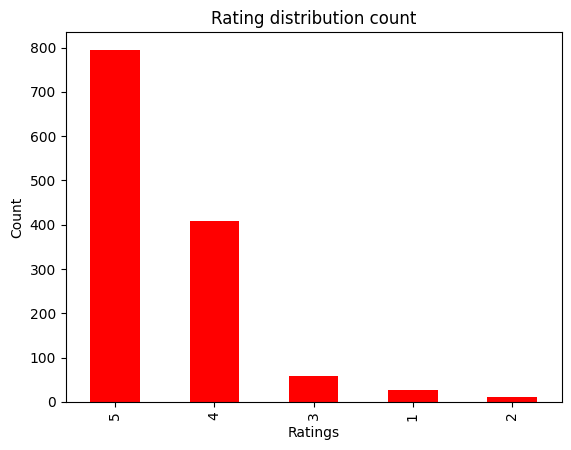

In [18]:
# Bar plot to visualize the total counts of each rating

data["rating"].value_counts().plot.bar(color="red")
plt.title("Rating distribution count")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()


In [19]:
# Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(
    f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}"
)


Rating value count - percentage distribution: 
rating
5    61.20
4    31.41
3     4.54
1     2.00
2     0.85
Name: count, dtype: float64


Let's plot the above values in a pie chart


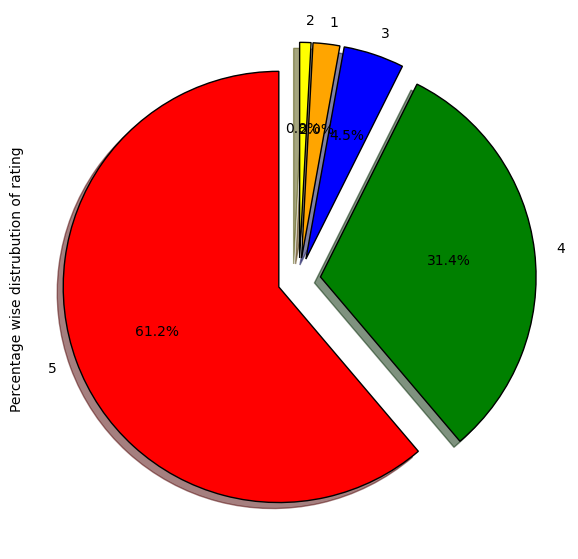

In [20]:
fig = plt.figure(figsize=(7, 7))

colors = ("red", "green", "blue", "orange", "yellow")

wp = {"linewidth": 1, "edgecolor": "black"}

tags = data["rating"].value_counts() / data.shape[0]

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

tags.plot(
    kind="pie",
    autopct="%1.1f%%",
    shadow=True,
    colors=colors,
    startangle=90,
    wedgeprops=wp,
    explode=explode,
    label="Percentage wise distrubution of rating",
)

from io import BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")


### Analyzing 'feedback' column

This column refers to the feedback of the verified review


In [21]:
# Distinct values of 'feedback' and its count

print(f"Feedback value count: \n{data['feedback'].value_counts()}")


Feedback value count: 
feedback
1    1262
0      37
Name: count, dtype: int64


There are 2 distinct values of 'feedback' present - 0 and 1. Let's see what kind of review each value corresponds to.


feedback value = 0


In [22]:
# Extracting the 'Comments' value for one record with feedback = 0

review_0 = data[data["feedback"] == 0].iloc[1]["Comments"]
print(review_0)


Bad quality


In [23]:
# Extracting the 'Comments' value for one record with feedback = 1

review_1 = data[data["feedback"] == 1].iloc[1]["Comments"]
print(review_1)


The rate offered was much lower than Amazon and Flipkart. Purchased again the same model. Took a 6V adapter, which is just as the batteries needed are 4 numbers. Alkaline batteries are costly and a 6V adapter would be a good choice.


From the above 2 examples we can see that feedback **0 is negative review** and **1 is positive review**


Let's plot the feedback value count in a bar graph


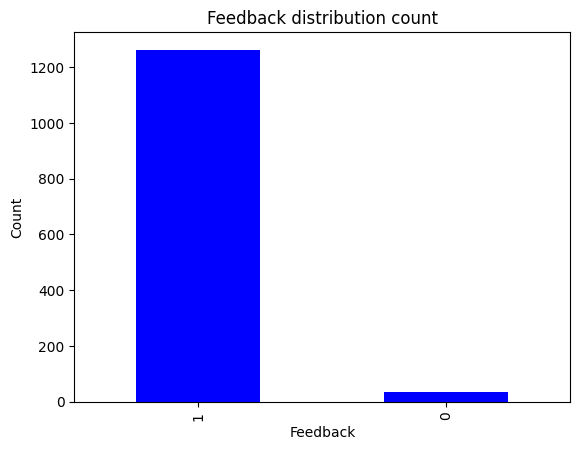

In [24]:
# Bar graph to visualize the total counts of each feedback

data["feedback"].value_counts().plot.bar(color="blue")
plt.title("Feedback distribution count")
plt.xlabel("Feedback")
plt.ylabel("Count")
plt.show()


In [25]:
# Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(
    f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}"
)


Feedback value count - percentage distribution: 
feedback
1    97.15
0     2.85
Name: count, dtype: float64


<Axes: ylabel='Percentage wise distrubution of feedback'>

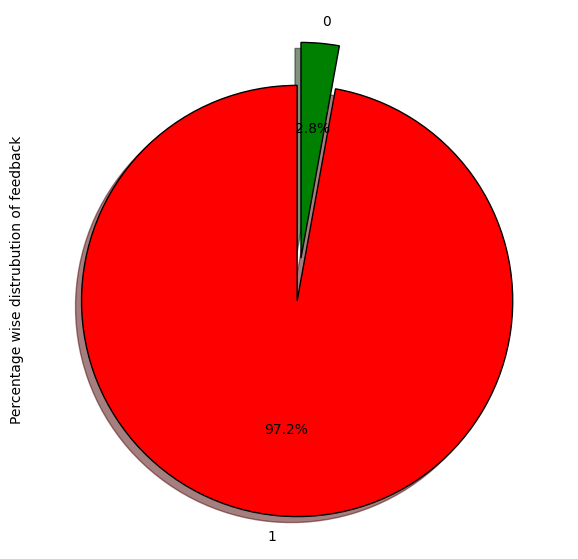

In [26]:
fig = plt.figure(figsize=(7, 7))

colors = ("red", "green")

wp = {"linewidth": 1, "edgecolor": "black"}

tags = data["feedback"].value_counts() / data.shape[0]

explode = (0.1, 0.1)

tags.plot(
    kind="pie",
    autopct="%1.1f%%",
    shadow=True,
    colors=colors,
    startangle=90,
    wedgeprops=wp,
    explode=explode,
    label="Percentage wise distrubution of feedback",
)


Let's see the 'rating' values for different values of 'feedback'


In [27]:
# Feedback = 0
data[data["feedback"] == 0]["rating"].value_counts()


rating
1    26
2    11
Name: count, dtype: int64

In [28]:
# Feedback = 1
data[data["feedback"] == 1]["rating"].value_counts()


rating
5    795
4    408
3     59
Name: count, dtype: int64

##### If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).


### Analyzing 'Comments' column

This column contains the textual review given by the user for a variation for the product.


In [29]:
data["length"].describe()


count    1299.000000
mean       82.158584
std        94.125622
min         3.000000
25%        26.000000
50%        53.000000
75%       101.000000
max      1174.000000
Name: length, dtype: float64

Length analysis for full dataset


[Text(0.5, 1.0, 'Distribution of length of review ')]

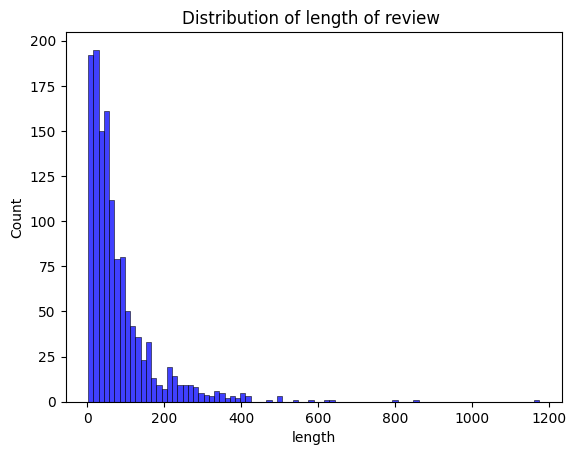

In [30]:
sns.histplot(data["length"], color="blue").set(
    title="Distribution of length of review "
)


Length analysis when feedback is 0 (negative)


[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

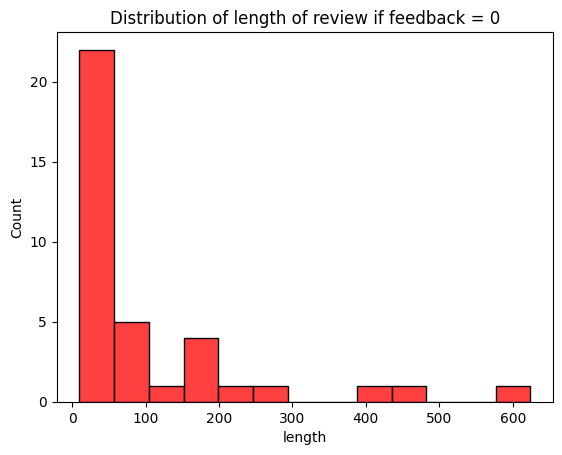

In [31]:
sns.histplot(data[data["feedback"] == 0]["length"], color="red").set(
    title="Distribution of length of review if feedback = 0"
)


Length analysis when feedback is 1 (positive)


[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

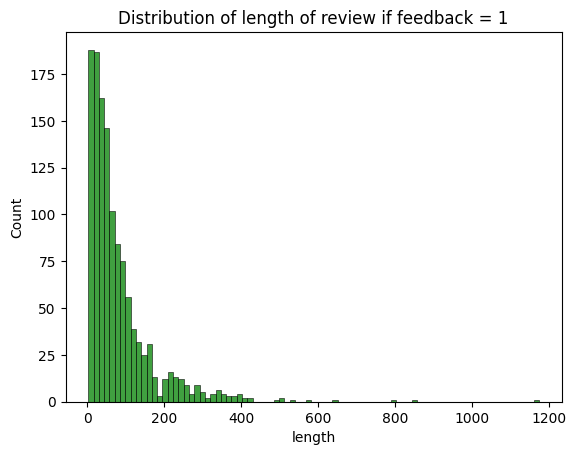

In [32]:
sns.histplot(data[data["feedback"] == 1]["length"], color="green").set(
    title="Distribution of length of review if feedback = 1"
)


Lengthwise mean rating


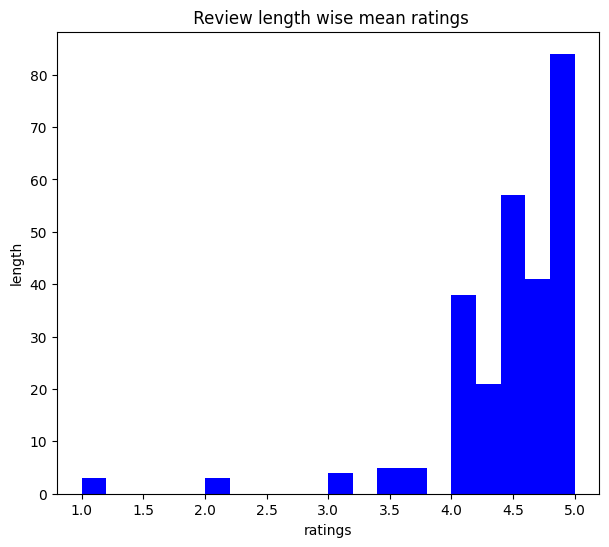

In [33]:
data.groupby("length")["rating"].mean().plot.hist(color="blue", figsize=(7, 6), bins=20)
plt.title(" Review length wise mean ratings")
plt.xlabel("ratings")
plt.ylabel("length")
plt.show()


In [34]:
cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(data.Comments)


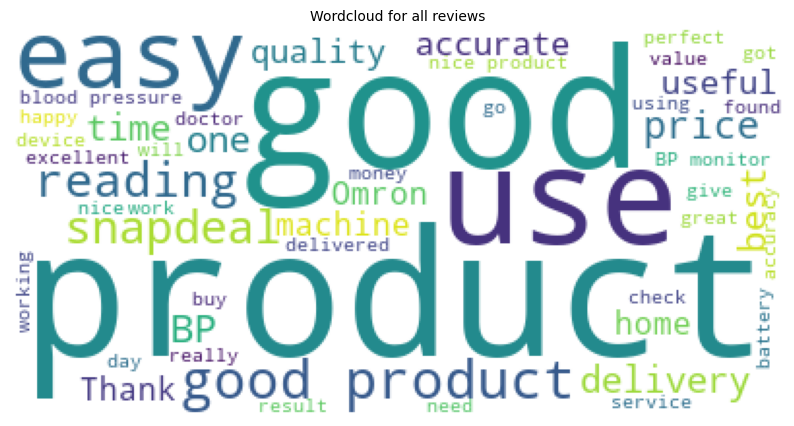

In [35]:
# Combine all reviews
reviews = " ".join([review for review in data["Comments"]])

# Initialize wordcloud object
wc = WordCloud(background_color="white", max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wc.generate(reviews))
plt.title("Wordcloud for all reviews", fontsize=10)
plt.axis("off")
plt.show()


Lets find the unique words in each feedback category


In [36]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data["feedback"] == 0]["Comments"]])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data["feedback"] == 1]["Comments"]])
pos_reviews = pos_reviews.lower().split()

# Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)


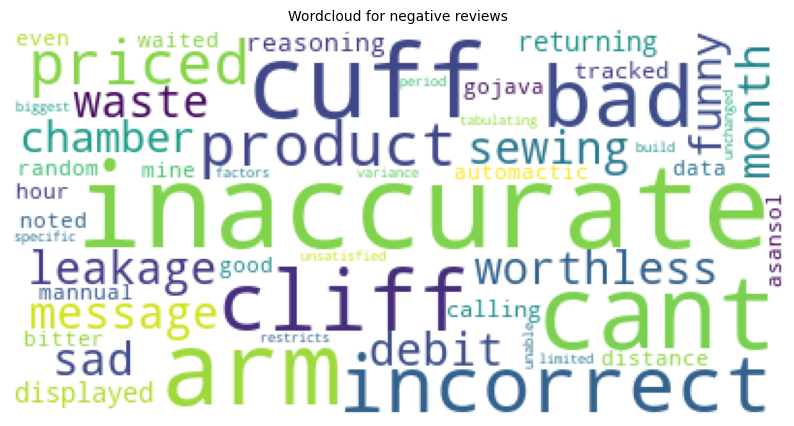

In [37]:
wc = WordCloud(background_color="white", max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wc.generate(unique_negative))
plt.title("Wordcloud for negative reviews", fontsize=10)
plt.axis("off")
plt.show()


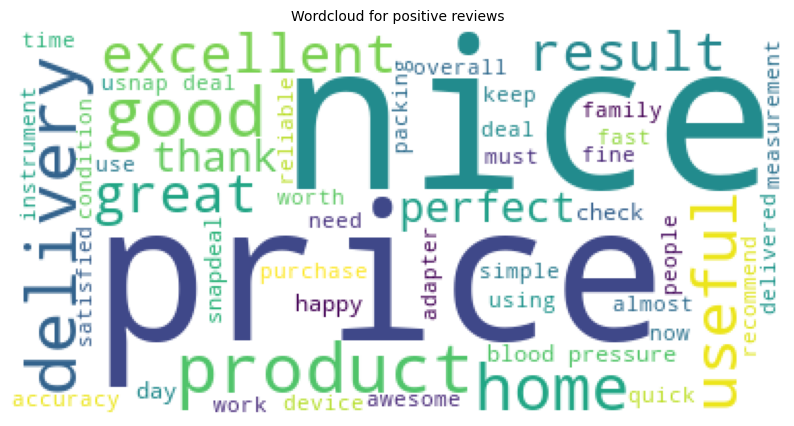

In [38]:
wc = WordCloud(background_color="white", max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wc.generate(unique_positive))
plt.title("Wordcloud for positive reviews", fontsize=10)
plt.axis("off")
plt.show()


In [165]:
print(unique_negative)


cliff leakage sewing cliff. message bad.. sad month worthless inaccurate waste debit chamber. 160/82 201/110 ..................too funny bad.... displayed returning (reasoning calling tracked distance waited hour ,but noted gojava (asansol). products.even .but bitter automactic mannual mine random data. good.we cant tabulating himself build. unsatisfied. incorrect variance factors unchanged period. biggest arm-cuff, restricts limited/specific arm-cuff more. unable arm-cuff (bigger size) inaccurate.on 130/90 shooting 170/110 og incorrect sadly avg away replaced cant generated belt cant comfortable. product.every reviews. priced priced cases inaccurate spend inaccurate more. hoping worst fears. 14 8 gap happening again. soon writing resolve issue. reading..took matching...after nt satisfied...too diff doc


In [39]:
# Assume unique_negative is a string containing all unique negative words separated by spaces
with open("unique_negative_keywords.txt", "w") as file:
    file.write(unique_negative)
